In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [5]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [7]:
X_train[:10], y_train[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [8]:
X_test[:10], y_test[:10]

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [11]:
def plot_predictions(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_label, c='b', label='Training Data')
    plt.scatter(test_data, test_label, c='g', label='Testing Data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend(prop={'size':14})

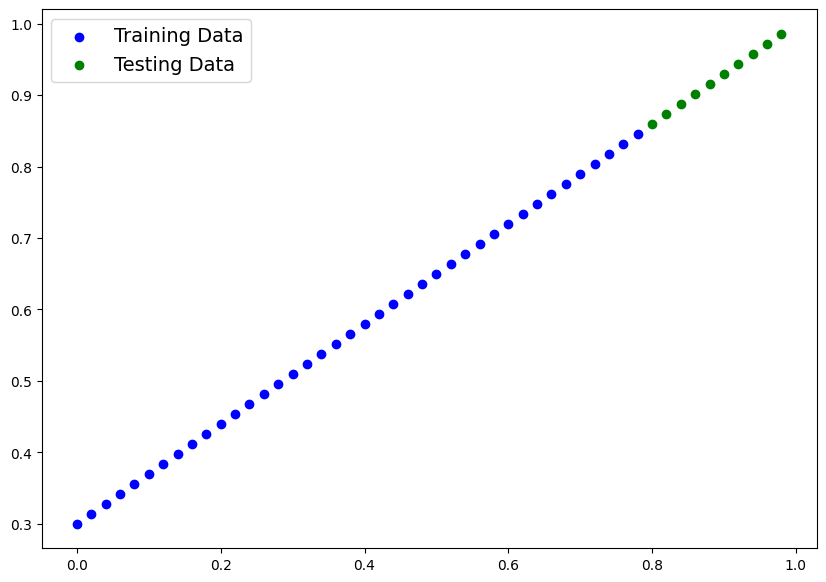

In [12]:
plot_predictions()

In [13]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [14]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [16]:
weight, bias

(0.7, 0.3)

In [18]:
with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

In [21]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

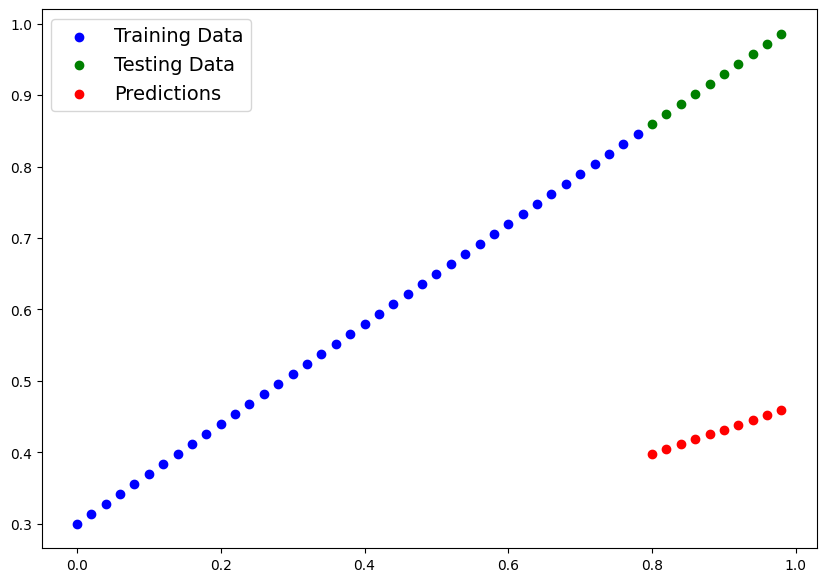

In [20]:
plot_predictions(predictions=y_pred)

In [25]:
loss_fn = torch.nn.L1Loss()
loss_fn

L1Loss()

In [26]:
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [28]:
epochs = 100

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    print(f'Loss is {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(model_0.state_dict())

Loss is 0.3128813589875055
OrderedDict([('weights', tensor([0.3757], dtype=torch.float64)), ('bias', tensor([0.2288], dtype=torch.float64))])
Loss is 0.19767135908630024
OrderedDict([('weights', tensor([0.4147], dtype=torch.float64)), ('bias', tensor([0.3288], dtype=torch.float64))])
Loss is 0.08682453331835696
OrderedDict([('weights', tensor([0.4522], dtype=torch.float64)), ('bias', tensor([0.3988], dtype=torch.float64))])
Loss is 0.04956193124898571
OrderedDict([('weights', tensor([0.4722], dtype=torch.float64)), ('bias', tensor([0.3988], dtype=torch.float64))])
Loss is 0.046102675453551345
OrderedDict([('weights', tensor([0.4881], dtype=torch.float64)), ('bias', tensor([0.3888], dtype=torch.float64))])
Loss is 0.04258420636595216
OrderedDict([('weights', tensor([0.5061], dtype=torch.float64)), ('bias', tensor([0.3838], dtype=torch.float64))])
Loss is 0.0392125752944114
OrderedDict([('weights', tensor([0.5220], dtype=torch.float64)), ('bias', tensor([0.3738], dtype=torch.float64))])


In [29]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

print(y_pred_new)

tensor([[0.8798],
        [0.8928],
        [0.9058],
        [0.9188],
        [0.9319],
        [0.9449],
        [0.9579],
        [0.9709],
        [0.9840],
        [0.9970]], dtype=torch.float64)


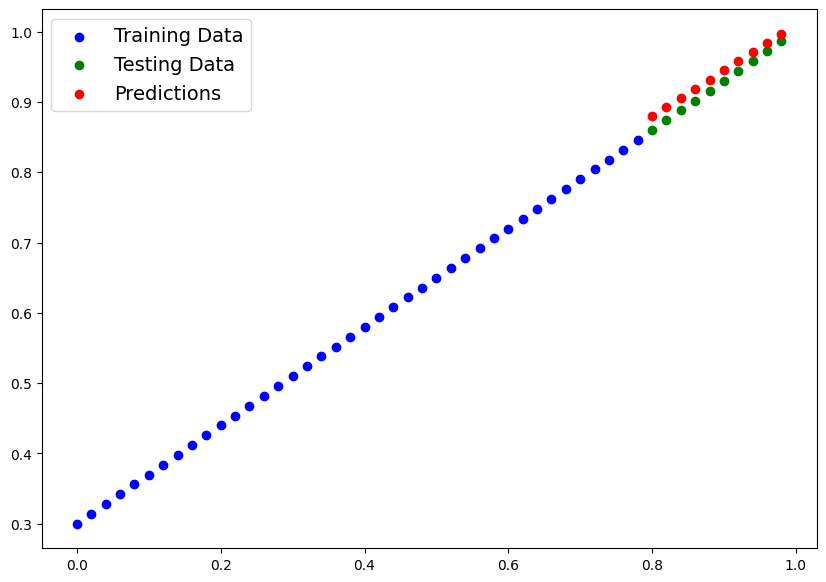

In [30]:
plot_predictions(predictions=y_pred_new)